# House Sales in King County, USA: Data Analysis and Prediction

In this notebook, we will explore and analyze the house sales dataset for King County, including Seattle. The dataset spans sales from May 2014 to May 2015. We will perform data wrangling, exploratory data analysis, and build models to predict house prices based on various features.

## About the Dataset

The dataset contains information about house sales, including:

- `id`: House identifier
- `date`: Sale date
- `price`: Sale price (target variable)
- `bedrooms`: Number of bedrooms
- `bathrooms`: Number of bathrooms
- `sqft_living`: Square footage of the home
- `sqft_lot`: Square footage of the lot
- `floors`: Number of floors
- `waterfront`: View of waterfront (1 if yes, 0 if no)
- `view`: View score (0 to 4)
- `condition`: Condition rating (1 to 5)
- `grade`: Overall grade (1 to 13)
- `sqft_above`: Square footage above basement
- `sqft_basement`: Square footage of the basement
- `yr_built`: Year built
- `yr_renovated`: Year renovated
- `zipcode`: Zip code
- `lat`: Latitude coordinate
- `long`: Longitude coordinate
- `sqft_living15`: Living area in 2015
- `sqft_lot15`: Lot size in 2015


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
%matplotlib inline

### Importing the Dataset

In [2]:
df = pd.read_csv('house_data.csv')

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Data types of each column
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# statistical summary
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Wrangling

In [6]:
# dropping the columns 'id' and 'Unnamed :0'
df.drop(["id","Unnamed: 0"], axis = 1,inplace = True) 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# We have missing values for the columns 'bedrooms' and 'bathrooms'
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [8]:
# replace the missign values with mean of the column
mean_bedrooms = df['bedrooms'].mean()
df['bedrooms'] = df['bedrooms'].replace(np.nan, mean_bedrooms)


In [9]:
# also replace the missing values of 'bathrooms' with the mean of the column 'bathrooms'
mean_bathrooms = df['bathrooms'].mean()
df['bathrooms'] = df['bathrooms'].replace(np.nan, mean_bathrooms)

### Exploratory Data Analysis

In [10]:
# Count the occurrences of each unique value in the 'floors' column and convert the result to a DataFrame
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers .

<Axes: xlabel='floors', ylabel='price'>

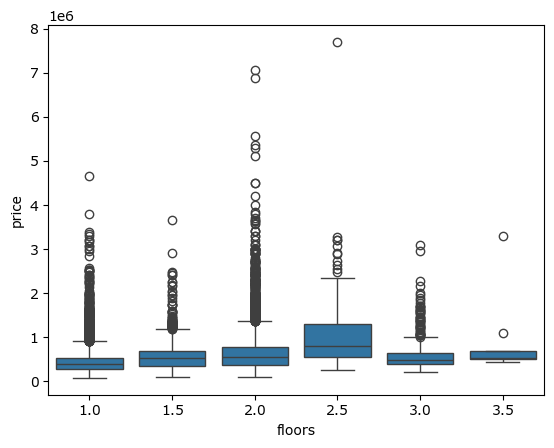

In [11]:
sns.boxplot(x="floors", y="price", data = df)

Use the function  regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

<Axes: xlabel='sqft_above', ylabel='price'>

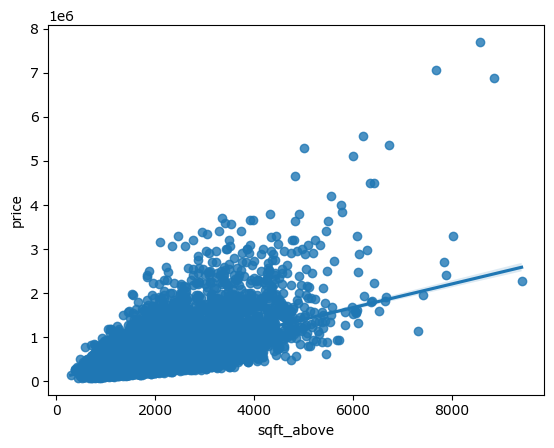

In [12]:
sns.regplot(x="sqft_above", y = "price", data = df)

We can use the Pandas method corr() to find the feature other than price that is most correlated with price.

In [13]:
#df.corr()['price'].sort_values()

### Model Development

We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.

In [14]:
X = df[['long']]
Y = df[['price']]
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.00046769430149007363

predicting 'price' using the feature 'sqft_living'

In [15]:
X = df[['sqft_living']]
Y = df[['price']]
lm = LinearRegression()
lm.fit(X, Y)
print(lm.score(X, Y))

0.4928532179037931


Fit a linear regression model to predict the <code>'price'</code> using the list of features:

In [16]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculate the R^2.

In [17]:
Z = df[features]
lm = LinearRegression()
lm.fit(Z, Y)
print(lm.score(Z, Y))

0.657637983726501


We will Create a list of tuples with the estimator name and model constructor:

- `'scale'` : `StandardScaler()`
- `'polynomial'` : `PolynomialFeatures(include_bias=False)`
- `'model'` : `LinearRegression()`

In [18]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Use the list to create a pipeline to predict 'price', fit it using the features in the list features

In [19]:
pipe = Pipeline(Input)
pipe.fit(Z,Y)
print(pipe.score(Z, Y))

0.7513404173795294


### Model Evaluation and Refinement

We will split the data into training and testing sets:

In [20]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.15, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Create and fit a Ridge regression object with regularization parameter set to 0.1

In [21]:
RidgeObj = Ridge(alpha = 0.1)
RidgeObj.fit(x_train, y_train)
RidgeObj.score(x_test, y_test)  # Calculate R^2 using the test data

0.6478759163939111

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data 


In [22]:
Poly_obj = PolynomialFeatures(degree=2)
x_train_pr = Poly_obj.fit_transform(x_train)
x_test_pr = Poly_obj.fit_transform(x_test)
Ridge_obj = Ridge(alpha=0.1)
Ridge_obj.fit(x_train_pr,y_train)
Ridge_obj.score(x_test_pr, y_test)

0.7002744271710593

Thank you for reviewing this notebook. For more projects and updates, visit my [GitHub profile](https://github.com/rahulvishwakarmax).